In [1]:
import pandas as pd
import numpy as np
pd.set_option('max_columns',999)
pd.set_option('max_rows',200)

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import seaborn as sns
sns.set() 
%matplotlib inline 
%config InlineBackend.figure_format = 'retina' 
sns.set_style(style='white')
sns.set_context(context ='paper')

import datetime
import os
from functools import reduce

In [2]:
# 한글 폰트 사용

plt.rcParams["font.family"] = 'NanumGothic'

In [3]:
projects = pd.read_csv('../ks-projects-201801.csv')

In [4]:
print(projects.shape)
projects.head()

(378661, 15)


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


## 변수 안에 들어가는 내용 확인

### >> state

In [5]:
projects['state'].unique()

array(['failed', 'canceled', 'successful', 'live', 'undefined',
       'suspended'], dtype=object)

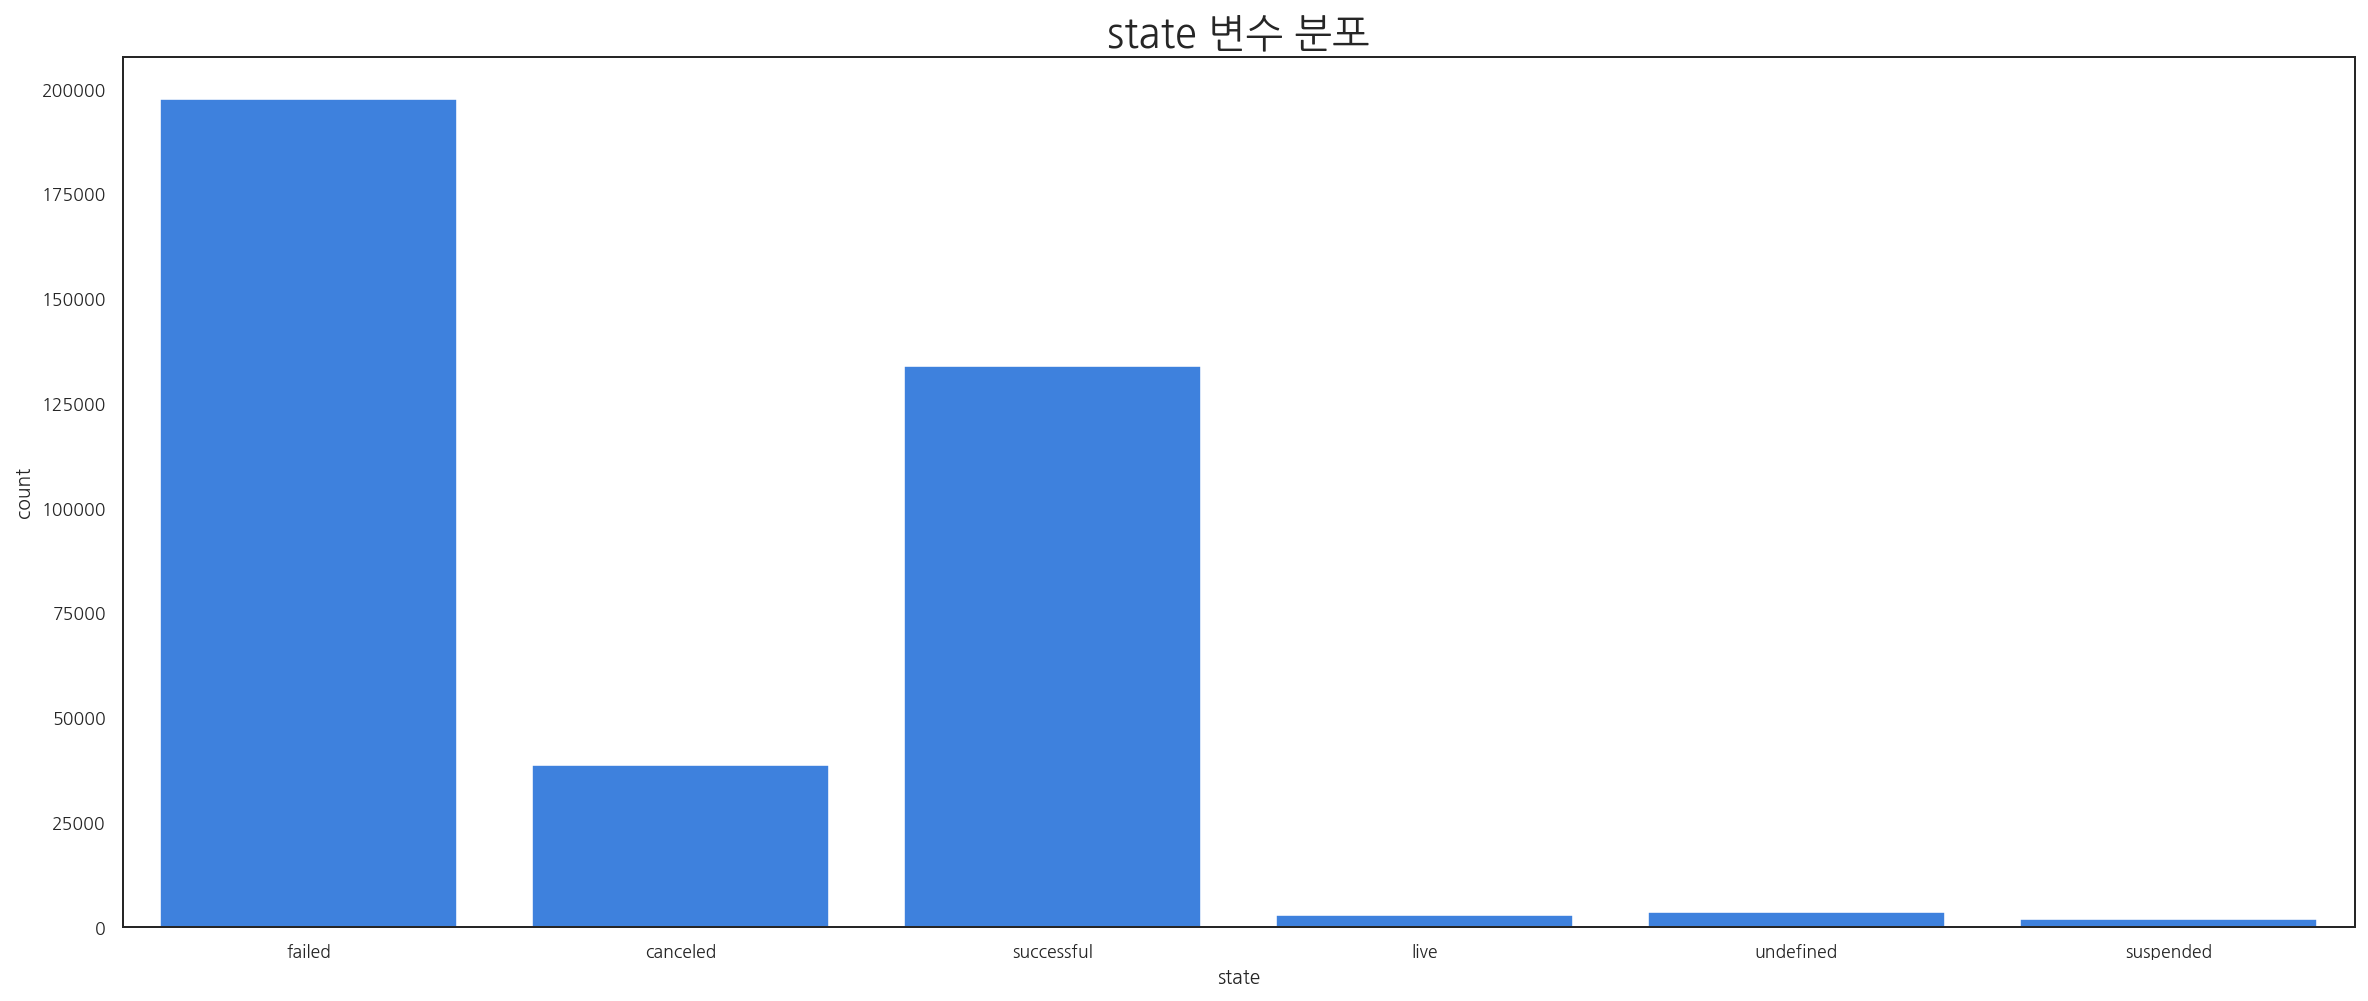

In [6]:
plt.figure(figsize=(20,8))
plt.title("state 변수 분포", fontsize = 20)
sns.countplot(x = 'state', data = projects, color = '#247DF7')

In [7]:
projects.groupby('state').count()['ID']

state
canceled       38779
failed        197719
live            2799
successful    133956
suspended       1846
undefined       3562
Name: ID, dtype: int64

### state 재정의
모금 금액이 목표 금액 이상이면 success, 미만이면 failed 

In [8]:
projects['state_new'] = projects.apply(lambda x: 'success' if x['usd_pledged_real'] >= x['usd_goal_real']
                                       else 'failed', axis = 1)

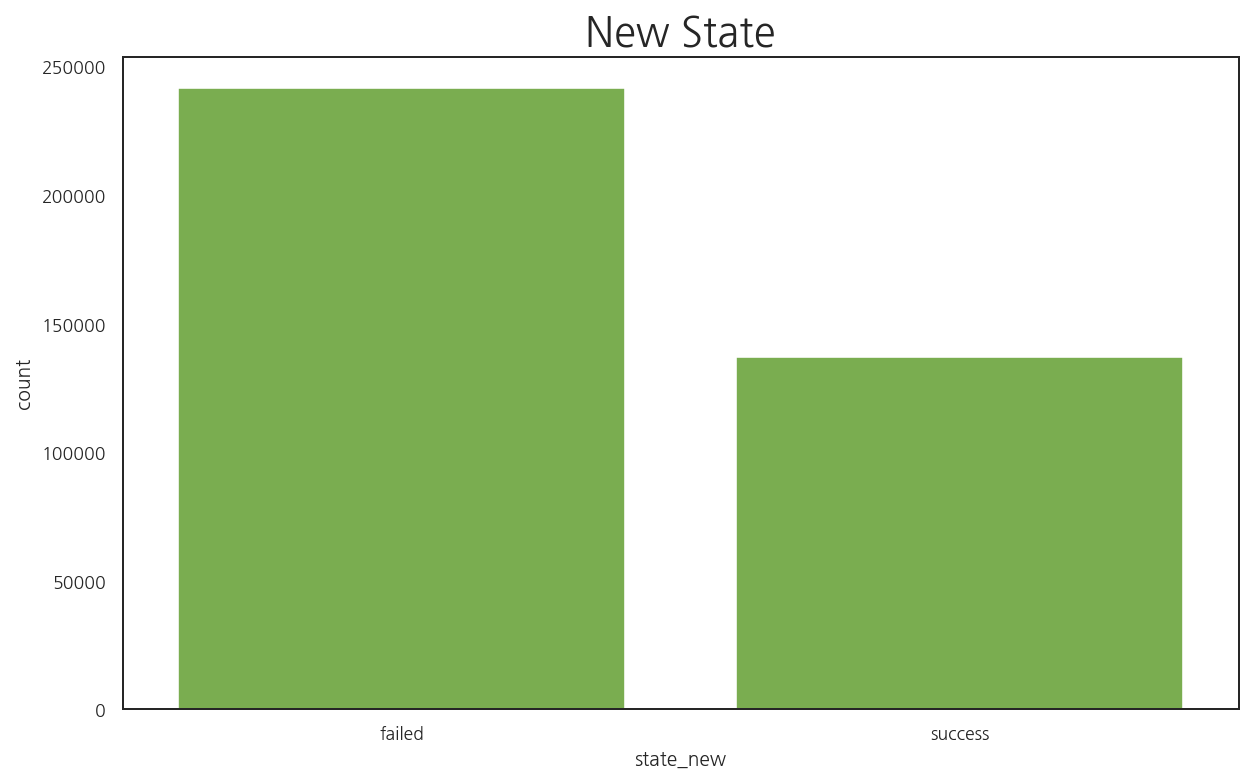

In [9]:
plt.figure(figsize=(10,6))
plt.title('New State', fontsize = 20)
sns.countplot(x = 'state_new', data = projects, color = '#78BD40')

In [10]:
projects.groupby('state_new').count()['ID']

state_new
failed     241619
success    137042
Name: ID, dtype: int64

### >> main_category & category

In [11]:
projects['main_category'].unique()

array(['Publishing', 'Film & Video', 'Music', 'Food', 'Design', 'Crafts',
       'Games', 'Comics', 'Fashion', 'Theater', 'Art', 'Photography',
       'Technology', 'Dance', 'Journalism'], dtype=object)

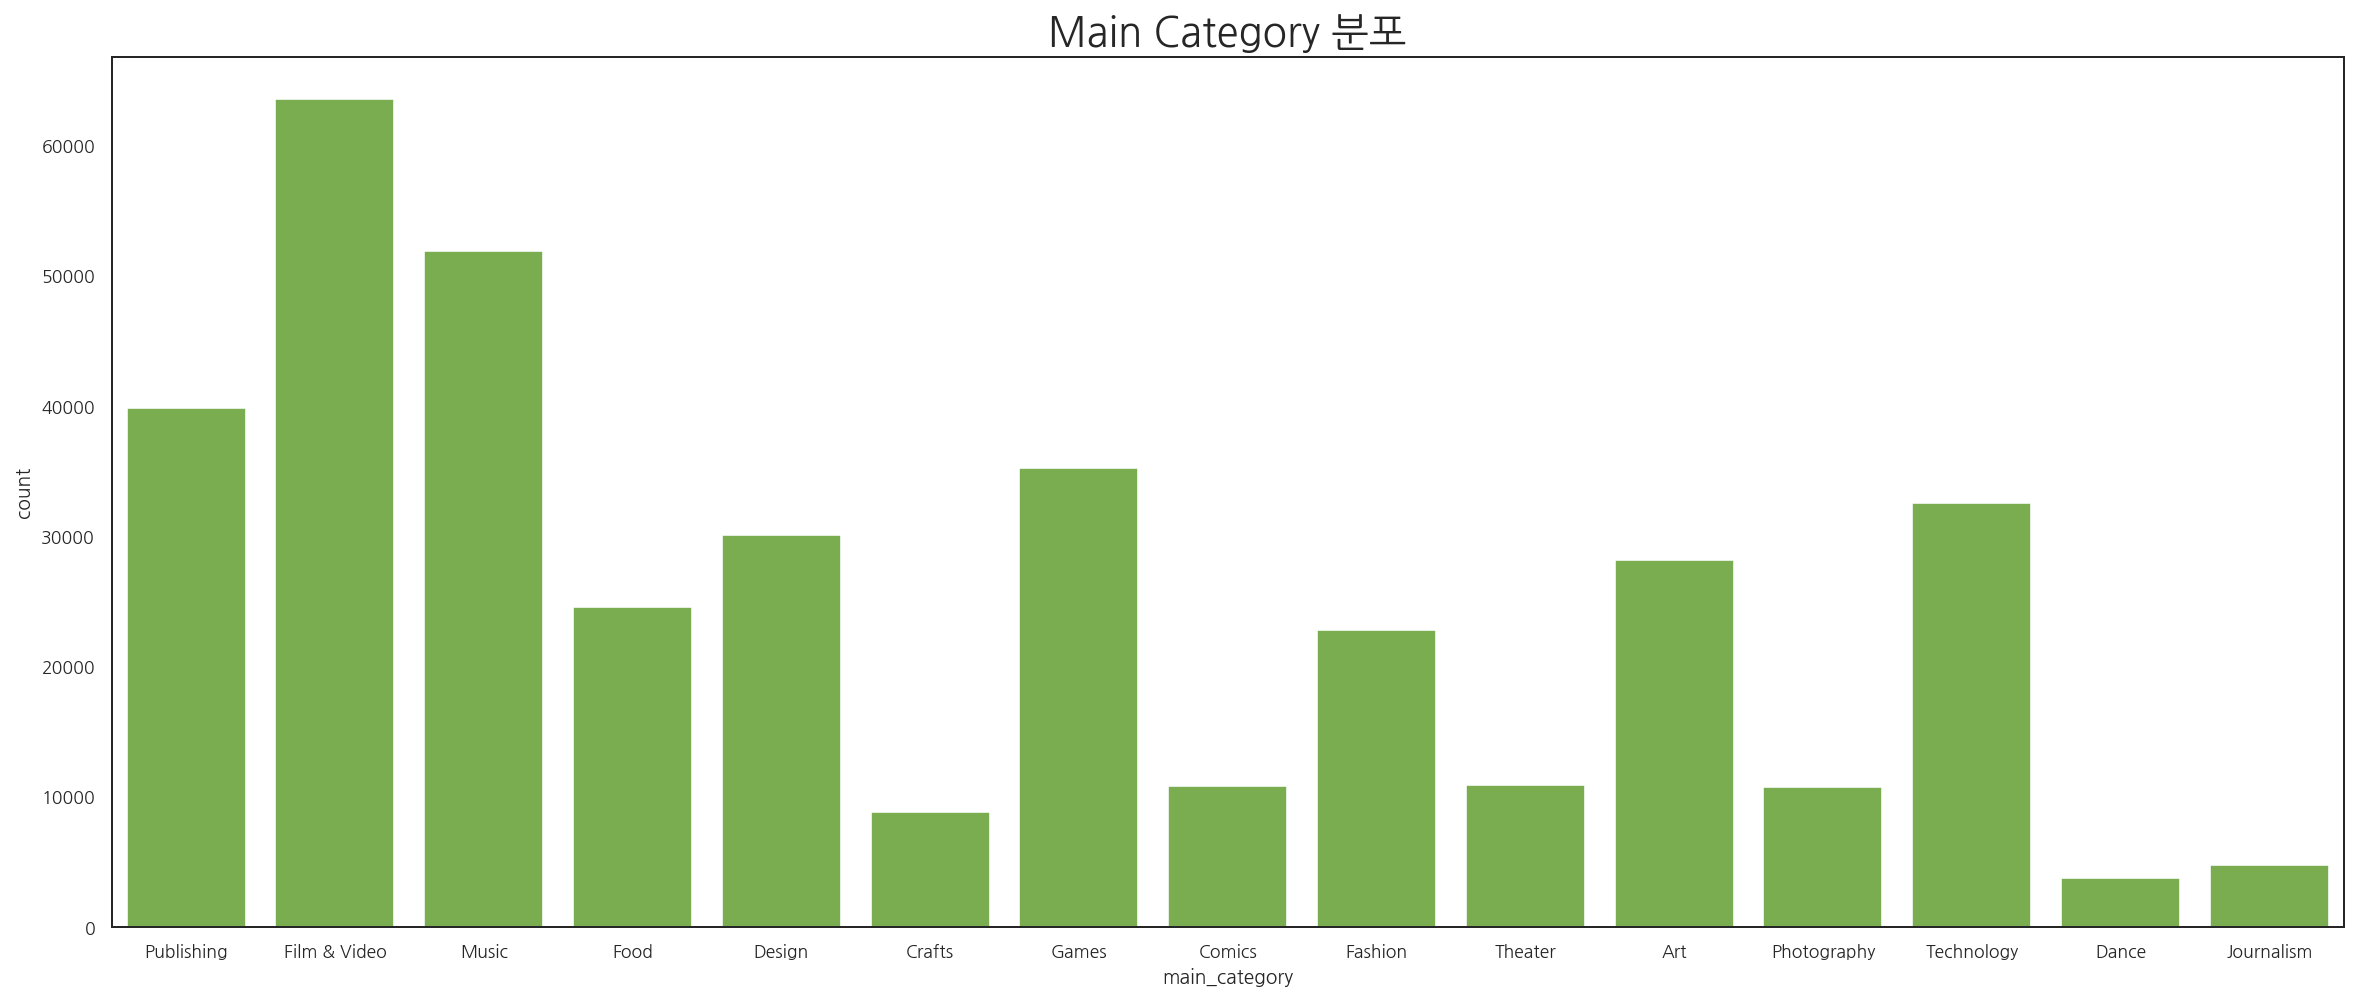

In [12]:
plt.figure(figsize=(20,8))
plt.title("Main Category 분포", fontsize = 20)
sns.countplot(x = 'main_category', data = projects, color = '#78BD40')

In [13]:
projects['category'].unique()

array(['Poetry', 'Narrative Film', 'Music', 'Film & Video', 'Restaurants',
       'Food', 'Drinks', 'Product Design', 'Documentary', 'Nonfiction',
       'Indie Rock', 'Crafts', 'Games', 'Tabletop Games', 'Design',
       'Comic Books', 'Art Books', 'Fashion', 'Childrenswear', 'Theater',
       'Comics', 'DIY', 'Webseries', 'Animation', 'Food Trucks',
       'Public Art', 'Illustration', 'Photography', 'Pop', 'People',
       'Art', 'Family', 'Fiction', 'Accessories', 'Rock', 'Hardware',
       'Software', 'Weaving', 'Gadgets', 'Web', 'Jazz', 'Ready-to-wear',
       'Festivals', 'Video Games', 'Anthologies', 'Publishing', 'Shorts',
       'Electronic Music', 'Radio & Podcasts', 'Apps', 'Cookbooks',
       'Apparel', 'Metal', 'Comedy', 'Hip-Hop', 'Periodicals', 'Dance',
       'Technology', 'Painting', 'World Music', 'Photobooks', 'Drama',
       'Architecture', 'Young Adult', 'Latin', 'Mobile Games', 'Flight',
       'Fine Art', 'Action', 'Playing Cards', 'Makerspaces', 'Punk',
       

In [ ]:
cate = ['Publishing', 'Film & Video', 'Music', 'Food', 'Design', 'Crafts',
       'Games', 'Comics', 'Fashion', 'Theater', 'Art', 'Photography',
       'Technology', 'Dance', 'Journalism']

percent_list = []

for i in cate:
    cate_df = projects_fin[lambda x: x['main_category'] == i]
    percent = len(cate_df[lambda x: x['state_new'] == 'success']) / len(cate_df)
    percent_list.append(percent)

In [ ]:
tmp = pd.DataFrame({'bars' : ['Publishing', 'Film & Video', 'Music', 'Food', 'Design', 'Crafts',
       'Games', 'Comics', 'Fashion', 'Theater', 'Art', 'Photography',
       'Technology', 'Dance', 'Journalism'], 
                    'percent' : percent_list})

In [89]:
tmp

,bars,percent
0,Publishing,0.307610
1,Film & Video,0.376212
2,Music,0.491337
3,Food,0.248453
4,Design,0.358442
5,Crafts,0.229371
6,Games,0.355452
7,Comics,0.535616
8,Fashion,0.246631
9,Theater,0.599963


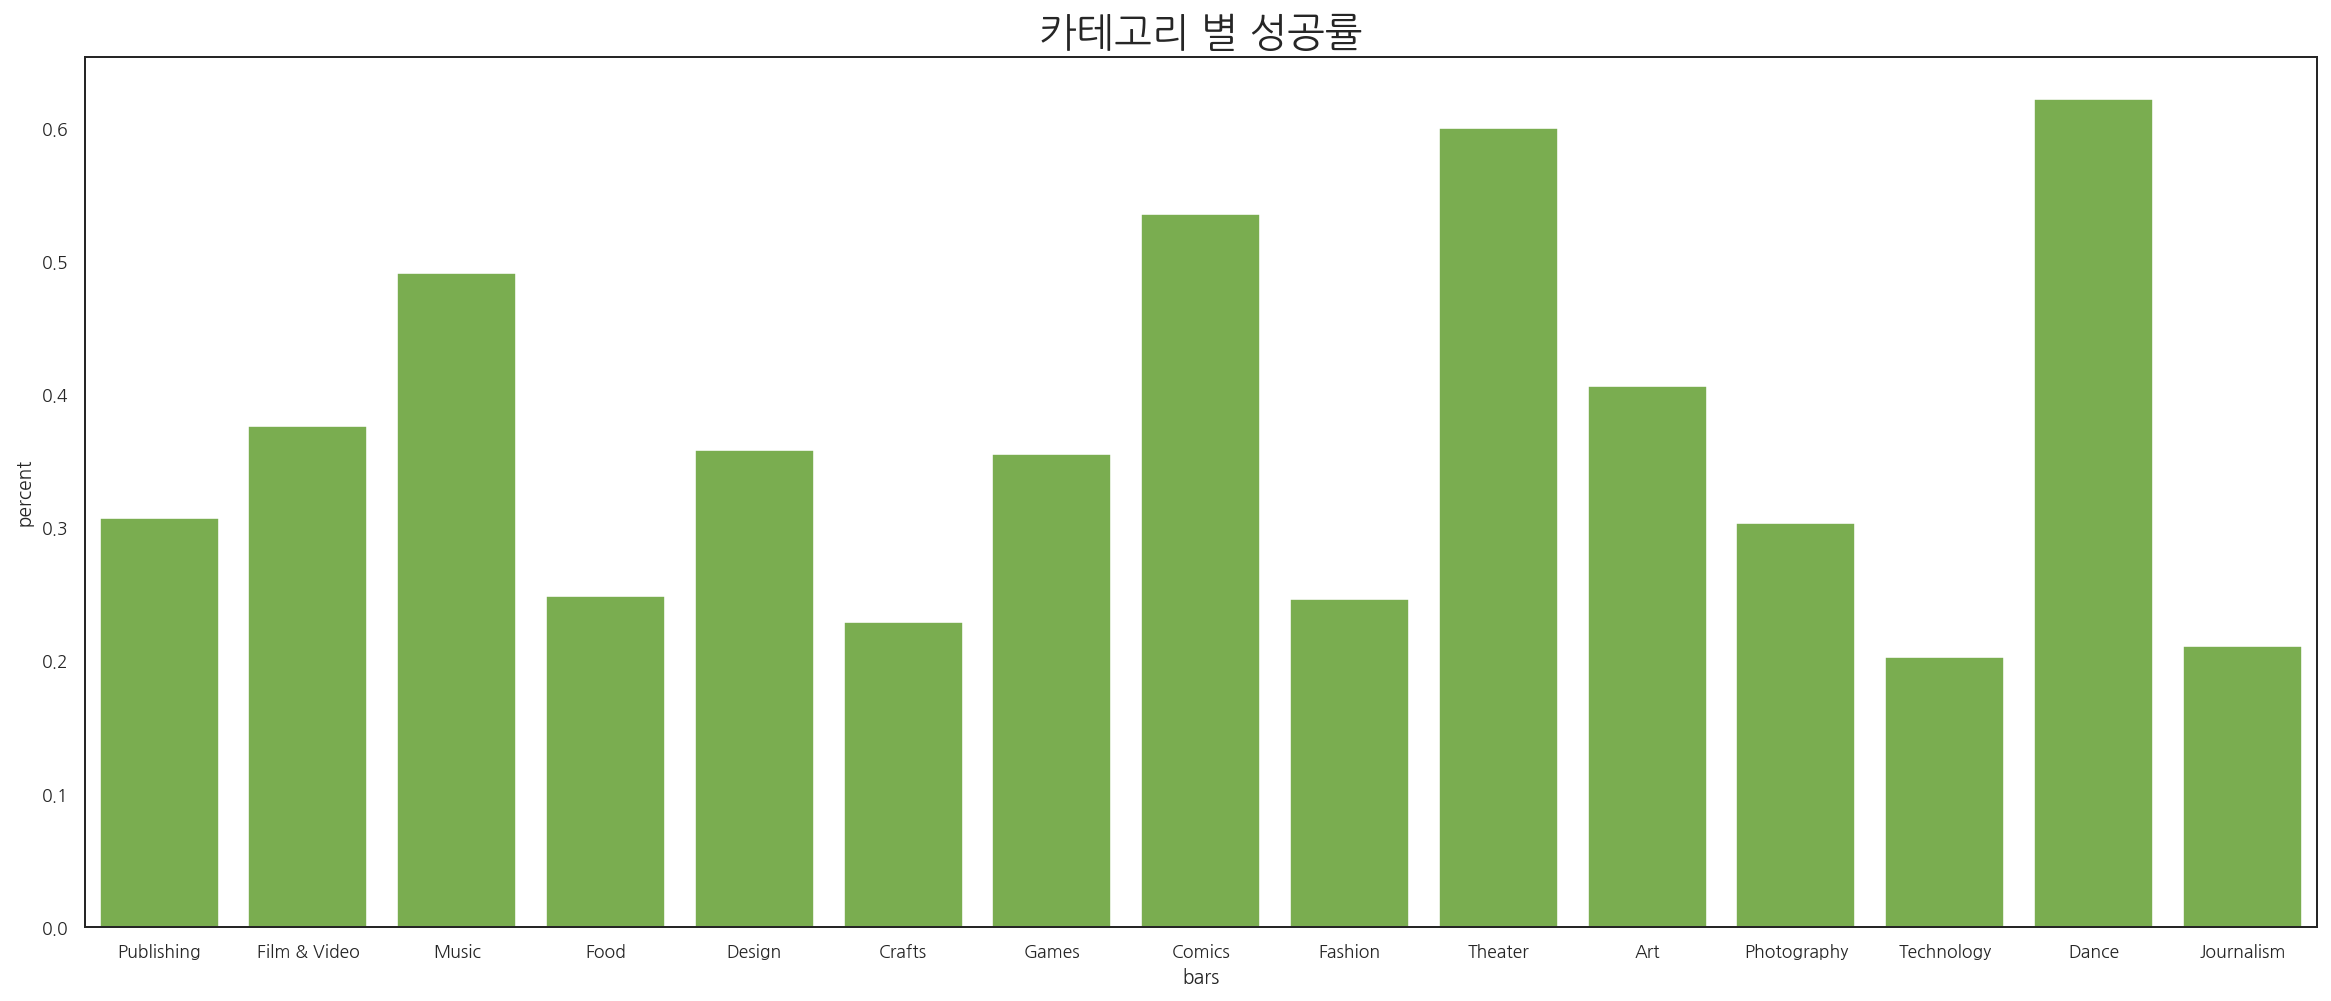

In [91]:
plt.figure(figsize=(20,8))
plt.title("카테고리 별 성공률", fontsize = 20)
sns.barplot(x = "bars", y = "percent", data = tmp, color = '#78BD40')

### >> deadline & launched --> 펀딩 기간

In [18]:
projects['deadline_dt'] = projects.apply(lambda x: datetime.datetime.strptime(x['deadline'], "%Y-%m-%d").date(), axis = 1)
projects['launched_dt'] = projects.apply(lambda x: datetime.datetime.strptime(x['launched'].split(" ")[0], "%Y-%m-%d").date(), axis = 1)

In [19]:
projects['term'] = projects.apply(lambda x: int(str(x['deadline_dt'] - x['launched_dt']).split(" ")[0]), axis = 1)
projects['term_str'] = projects.apply(lambda x: str(x['term']), axis = 1)

In [20]:
projects.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,state_new,deadline_dt,launched_dt,term,term_str
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,failed,2015-10-09,2015-08-11,59,59
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00,failed,2017-11-01,2017-09-02,60,60
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00,failed,2013-02-26,2013-01-12,45,45
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00,failed,2012-04-16,2012-03-17,30,30
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00,failed,2015-08-29,2015-07-04,56,56


In [21]:
projects['term'].unique()

array([   59,    60,    45,    30,    56,    35,    20,    28,    15,
          31,    40,    11,    25,    48,    41,    29,    42,    43,
          53,    34,    22,    17,    44,    46,    32,    66,    49,
          36,    61,    38,    37,    18,    33,    14,     5,    55,
          26,    51,    27,    19,    24,    52,    21,    16,    50,
          87,    23,    39,    13,    12,    10,    57,    83,     8,
          54,    90,     6,    47,    71,     9,    62,     1,     7,
          73,    58,    64,    91,     3,    89, 14867,    70,    69,
          72,     4,    68,    85,    67,    74,    81,    84,    88,
          75,     2,    65,    76,    63,    80,    79,    86,    78,
          82,    77,    92, 14835, 14750, 14761, 14733, 14709, 16739],
      dtype=int64)

In [22]:
# launch 날짜가 1970년으로 되어있는 row는 삭제
projects_new = projects[lambda x: x['term'] < 100]

In [23]:
projects_new['term'].unique()

array([59, 60, 45, 30, 56, 35, 20, 28, 15, 31, 40, 11, 25, 48, 41, 29, 42,
       43, 53, 34, 22, 17, 44, 46, 32, 66, 49, 36, 61, 38, 37, 18, 33, 14,
        5, 55, 26, 51, 27, 19, 24, 52, 21, 16, 50, 87, 23, 39, 13, 12, 10,
       57, 83,  8, 54, 90,  6, 47, 71,  9, 62,  1,  7, 73, 58, 64, 91,  3,
       89, 70, 69, 72,  4, 68, 85, 67, 74, 81, 84, 88, 75,  2, 65, 76, 63,
       80, 79, 86, 78, 82, 77, 92], dtype=int64)

In [24]:
projects_new = projects_new.reset_index().drop(['index'], axis = 1)

In [25]:
projects_new['term_str'] = projects_new.apply(lambda x: x['term_str'] if len(x['term_str']) != 1
                                             else '0' + x['term_str'], axis = 1)

In [26]:
projects_new['term_str'].unique()

array(['59', '60', '45', '30', '56', '35', '20', '28', '15', '31', '40',
       '11', '25', '48', '41', '29', '42', '43', '53', '34', '22', '17',
       '44', '46', '32', '66', '49', '36', '61', '38', '37', '18', '33',
       '14', '05', '55', '26', '51', '27', '19', '24', '52', '21', '16',
       '50', '87', '23', '39', '13', '12', '10', '57', '83', '08', '54',
       '90', '06', '47', '71', '09', '62', '01', '07', '73', '58', '64',
       '91', '03', '89', '70', '69', '72', '04', '68', '85', '67', '74',
       '81', '84', '88', '75', '02', '65', '76', '63', '80', '79', '86',
       '78', '82', '77', '92'], dtype=object)

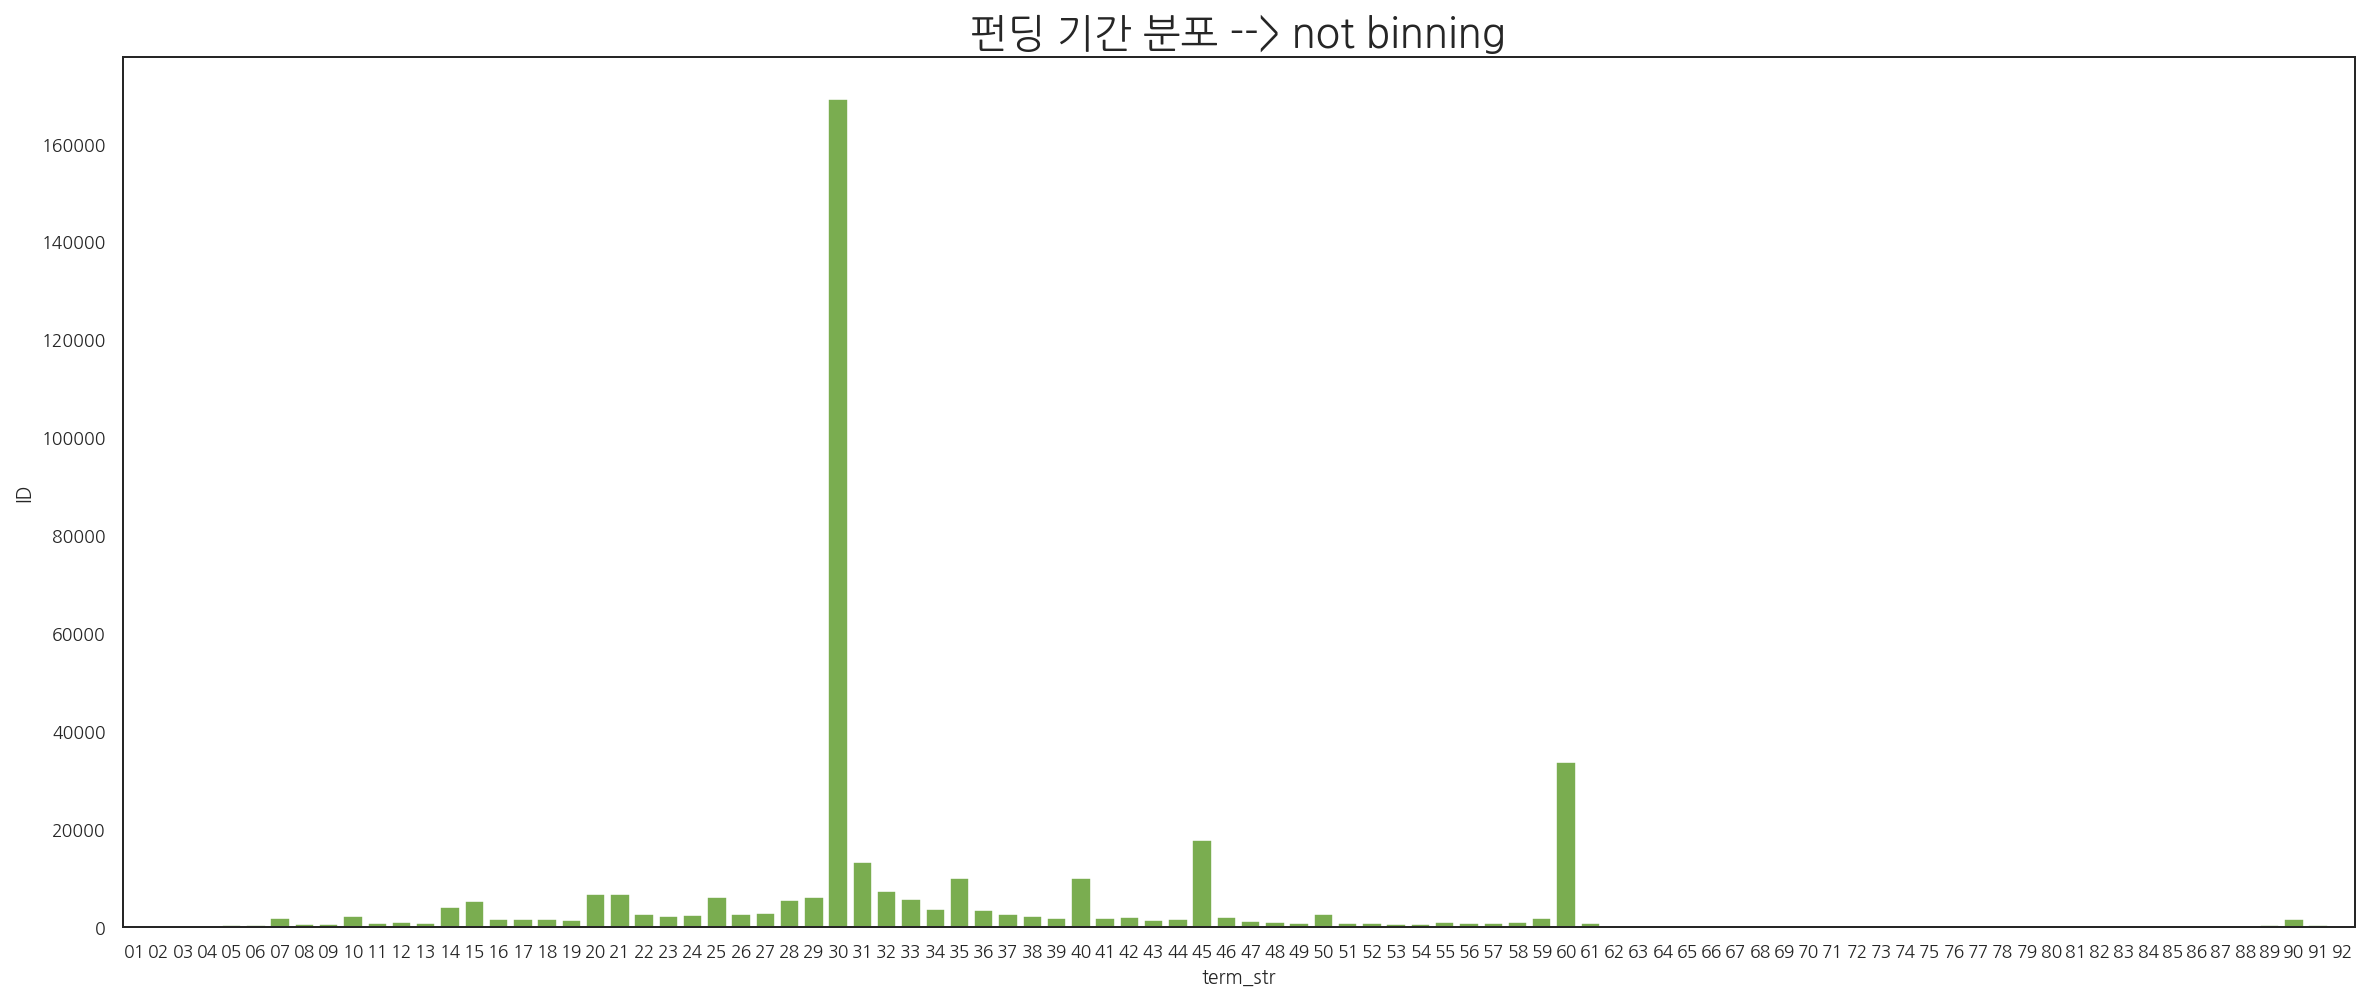

In [27]:
tmp = projects_new.groupby('term_str').count()[['ID']].reset_index()
plt.figure(figsize=(20,8))
sns.despine()
plt.title("펀딩 기간 분포 --> not binning", fontsize = 20)
sns.barplot(x = "term_str", y = "ID", data = tmp, color = '#78BD40')

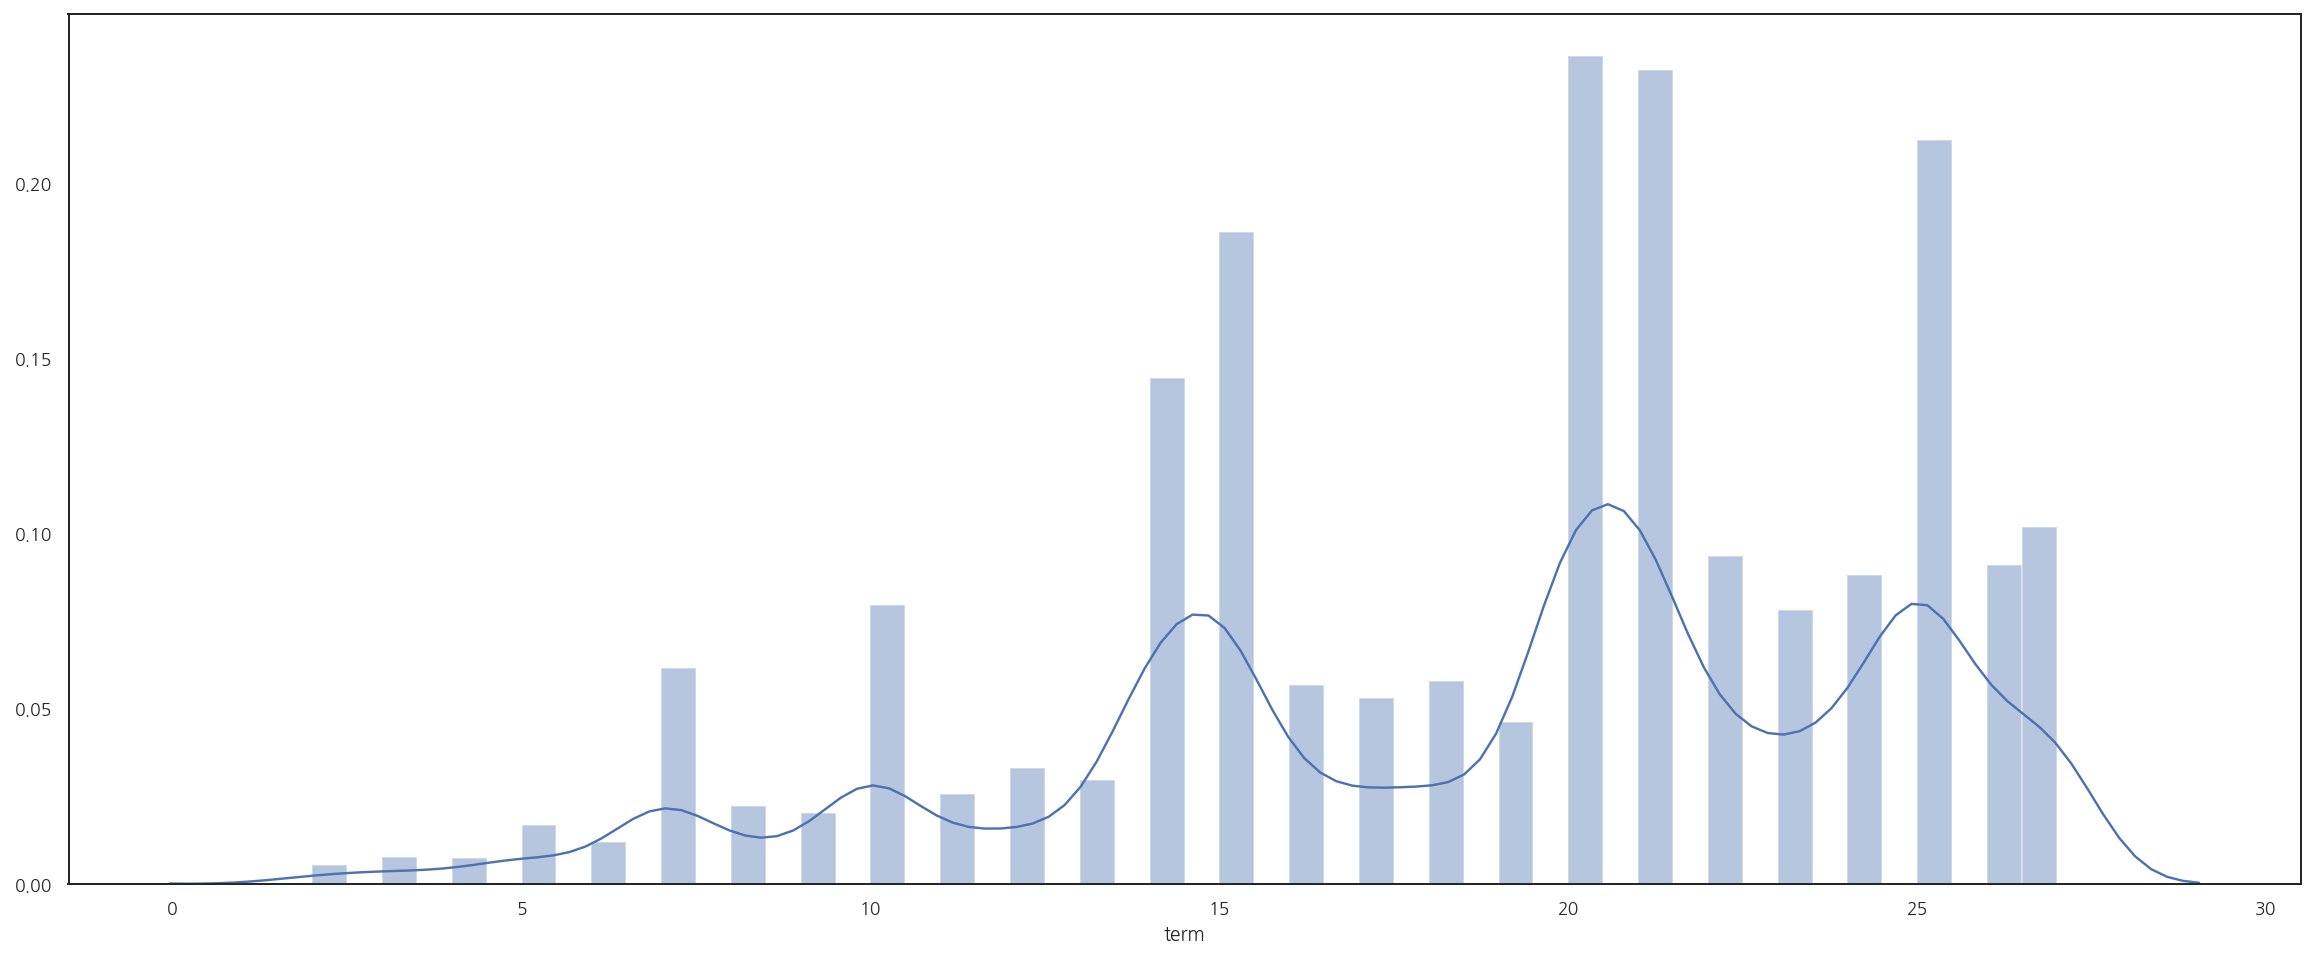

In [28]:
tmp2 = projects_new[lambda x: (x['term'] > 1) & (x['term'] < 28)]
plt.figure(figsize=(20,8))
sns.distplot(tmp2['term'])

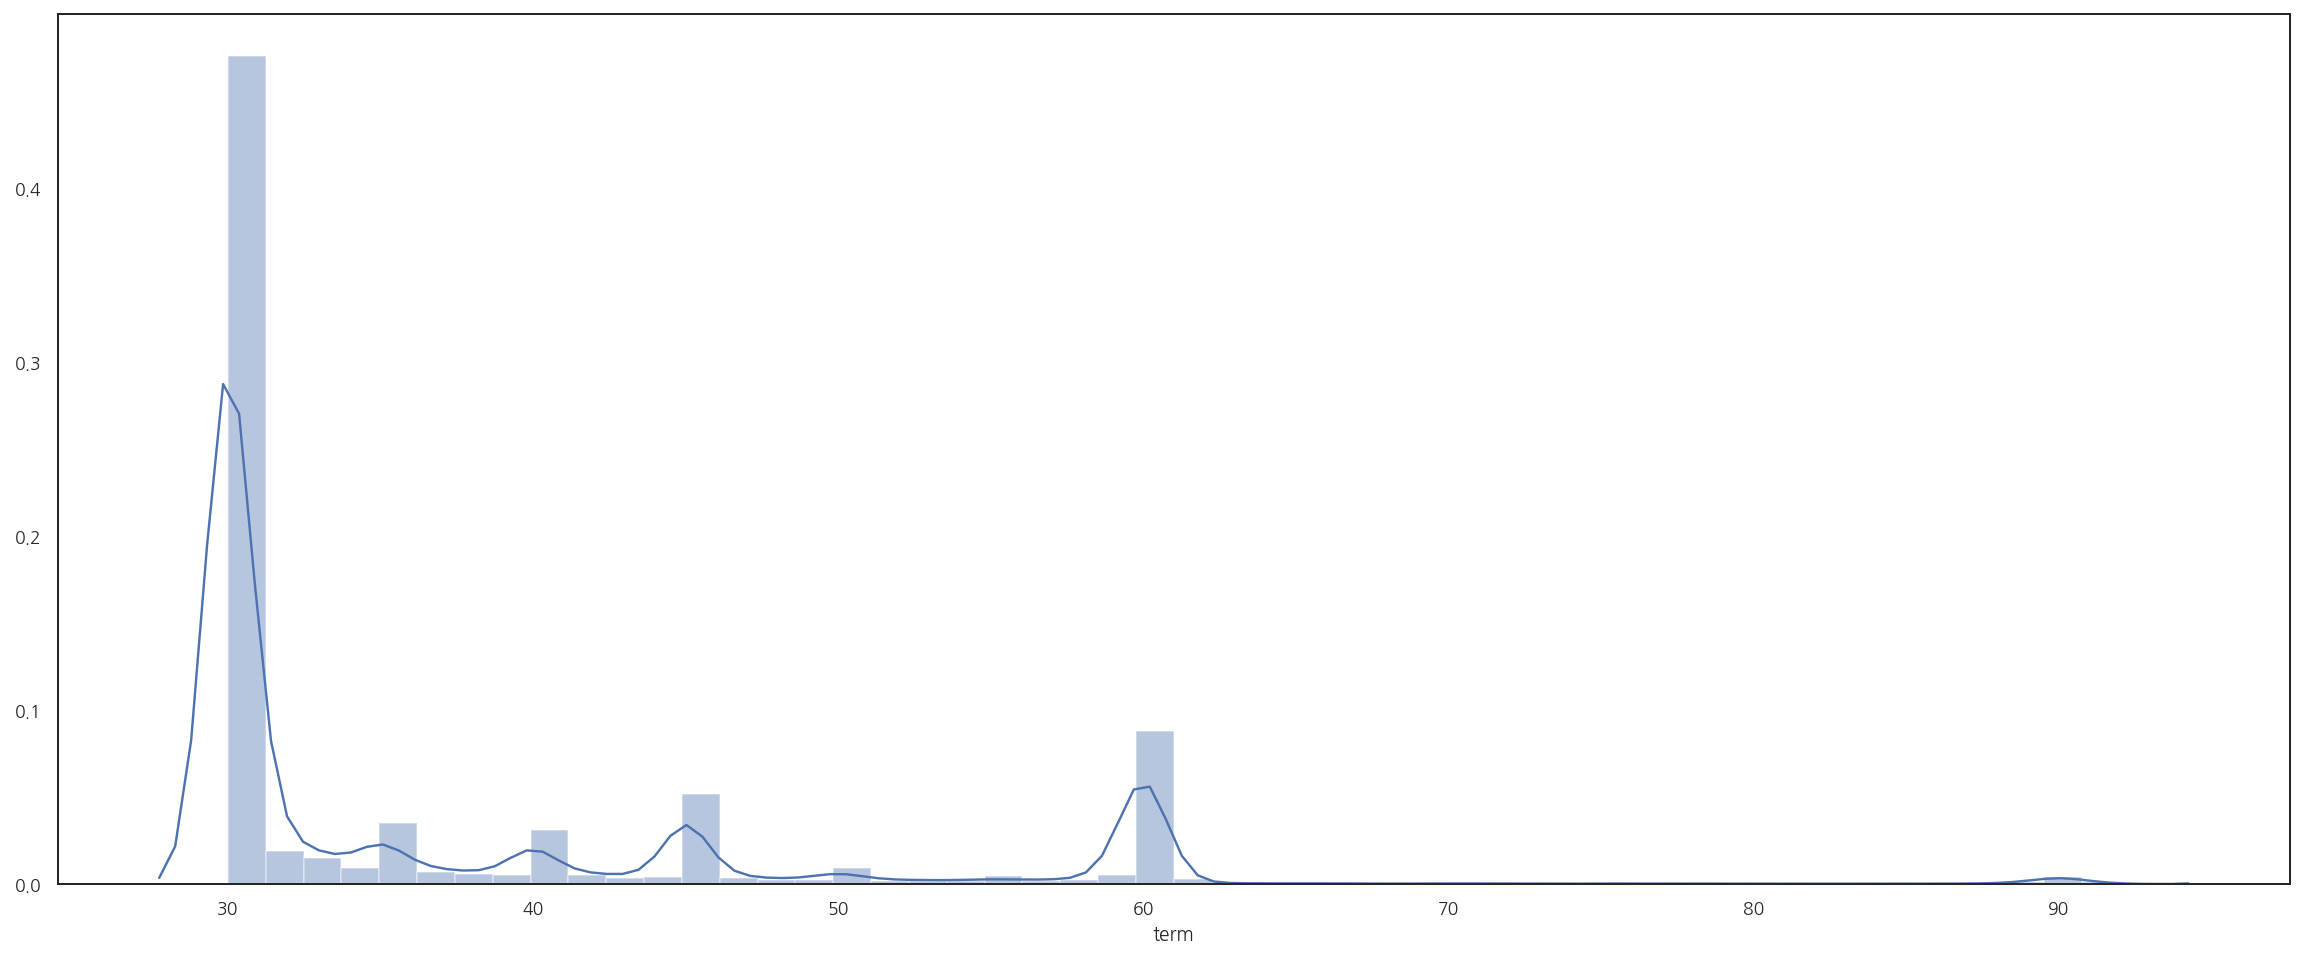

In [29]:
tmp2 = projects_new[lambda x: (x['term'] > 29)]
plt.figure(figsize=(20,8))
sns.distplot(tmp2['term'])

In [30]:
## 10일 (1주) / 15일 (2주) / 21일 (3주) / 30일 (한 달) / 45일 (한 달 반) / 60일 (두 달) / 92일 (두 달 이상~세 달)
projects_new['term_bin'] = projects_new.apply(lambda x: '1' if x['term'] <= 10
                                             else '2' if x['term'] <= 15
                                             else '3' if x['term'] <= 21
                                             else '4' if x['term'] <= 30
                                             else '5' if x['term'] <= 45
                                             else '6' if x['term'] <= 60
                                             else '7', axis = 1)

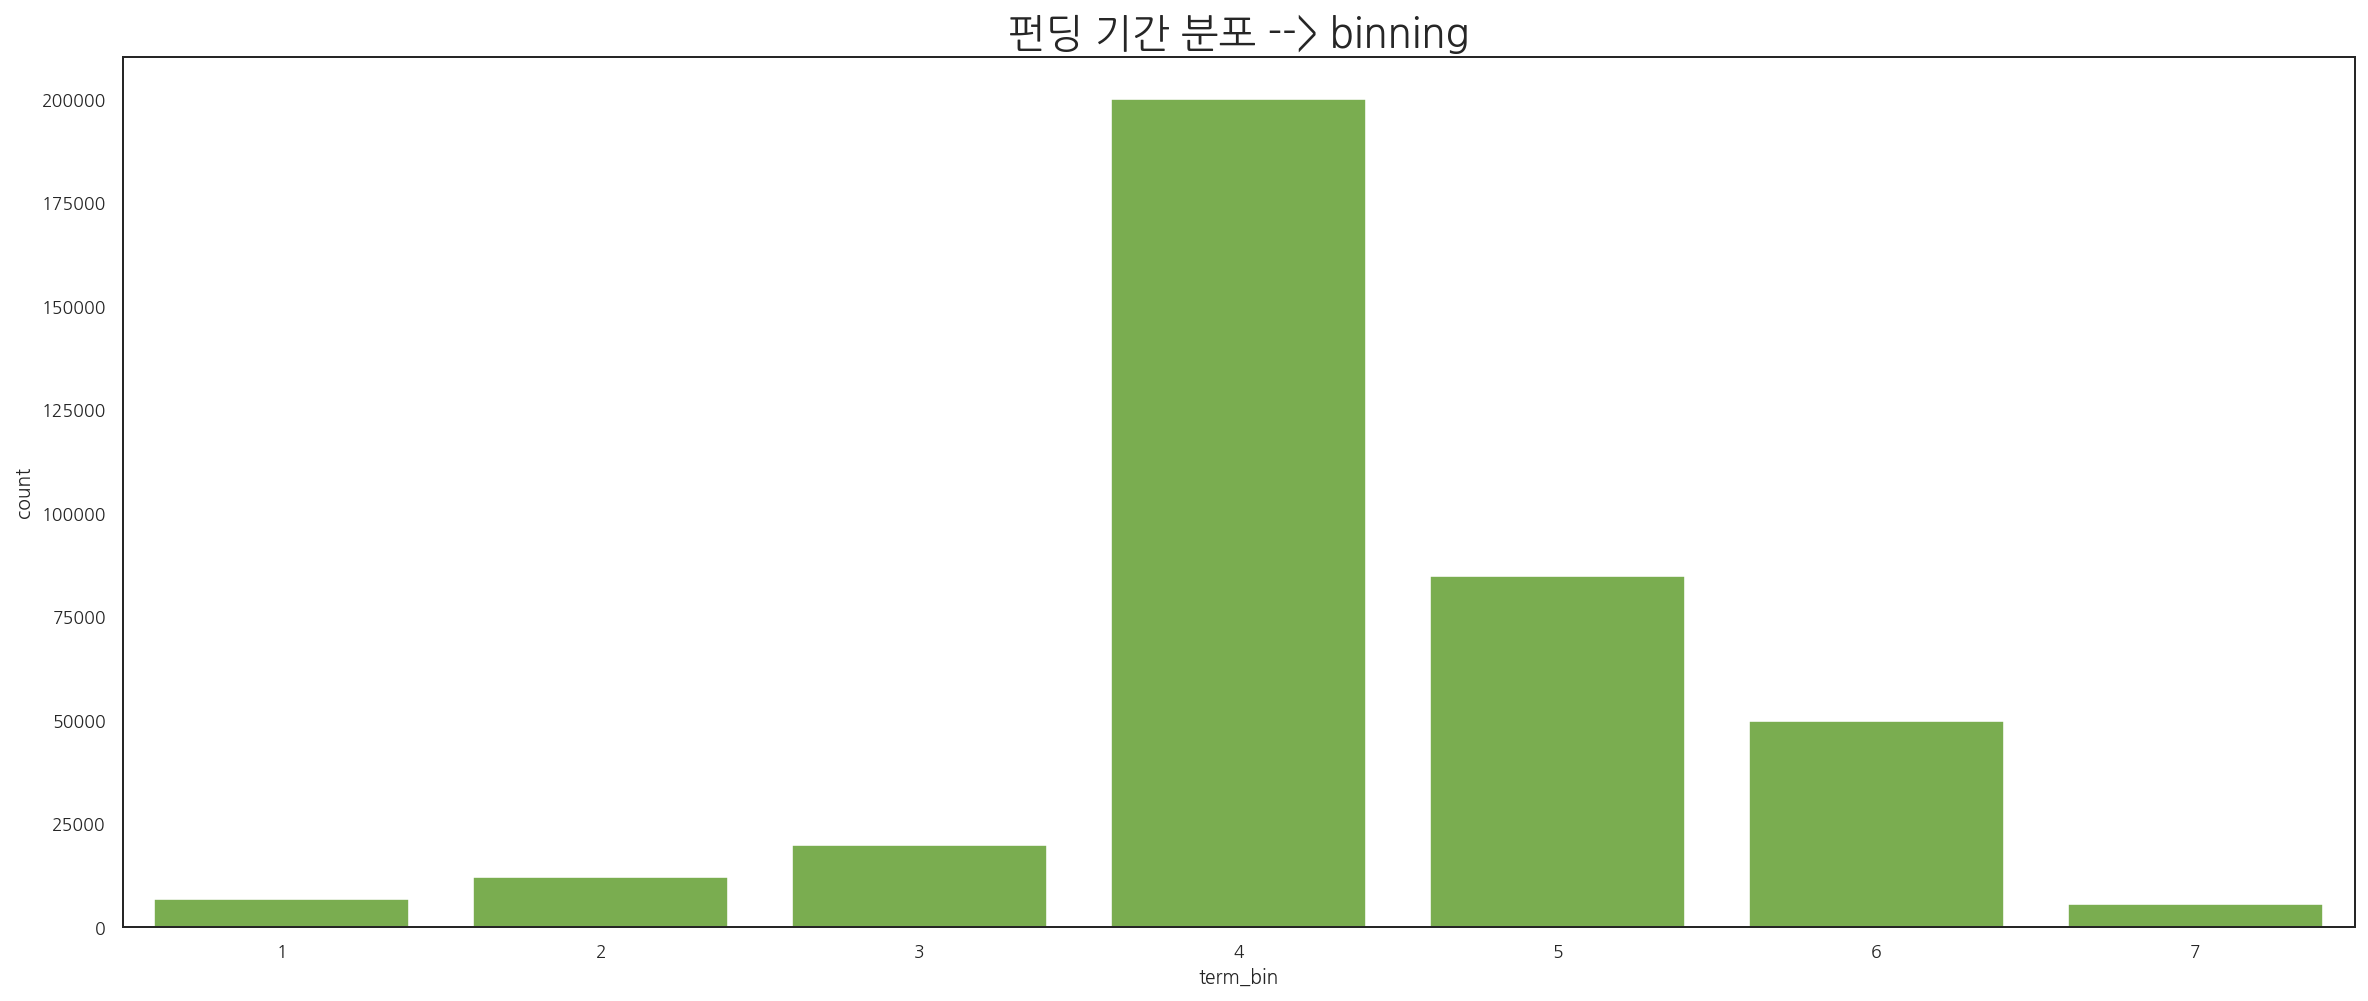

In [31]:
plt.figure(figsize=(20,8))
plt.title("펀딩 기간 분포 --> binning", fontsize = 20)
sns.countplot(x = 'term_bin', data = projects_new, color = '#78BD40')

In [32]:
percent_list = []

for i in range(7):
    percent = len(projects_new[lambda x: (x['term_bin'] == str(i+1)) & (x['state_new'] == 'success')]) / len(projects_new[lambda x: x['term_bin'] == str(i+1)])
    percent_list.append(percent)

In [33]:
tmp = pd.DataFrame({'bars' : ['1', '2', '3', '4', '5', '6', '7'], 
                    'percent' : percent_list})

In [34]:
tmp

,bars,percent
0,1,0.451594
1,2,0.476839
2,3,0.502053
3,4,0.347756
4,5,0.413400
5,6,0.237108
6,7,0.342596


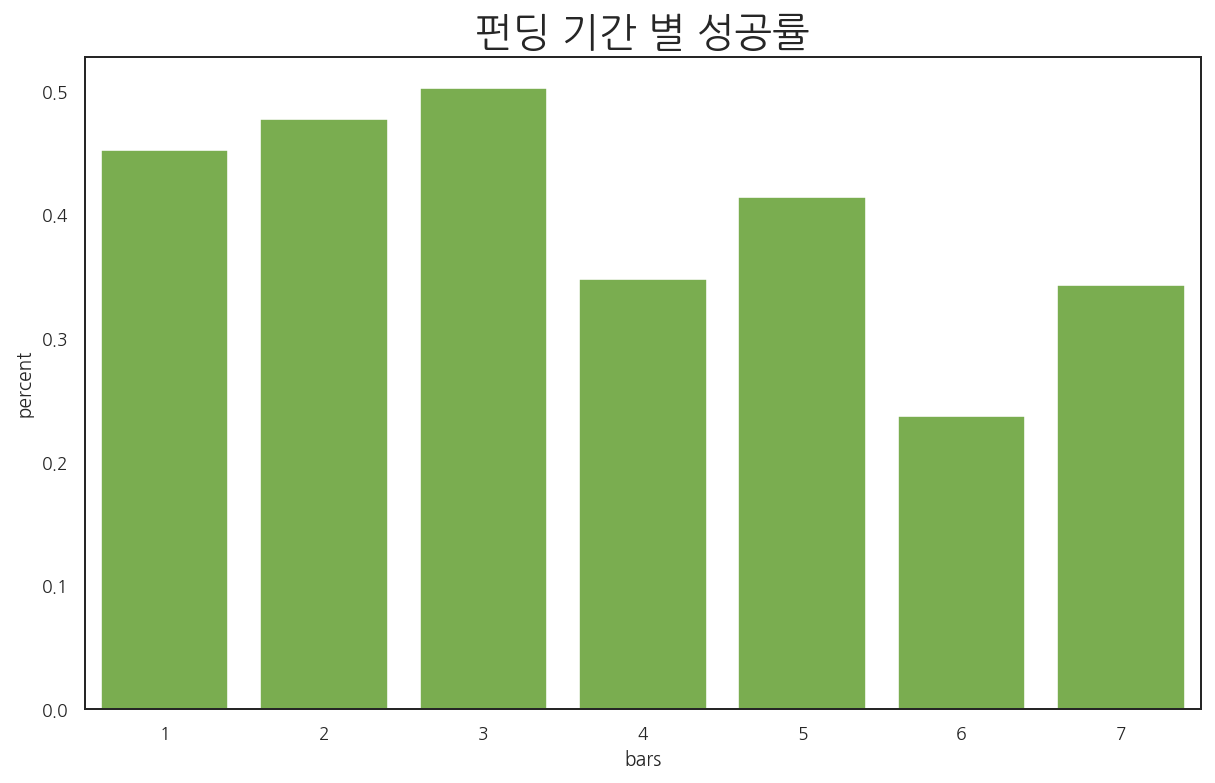

In [35]:
plt.figure(figsize=(10,6))
plt.title("펀딩 기간 별 성공률", fontsize = 20)
sns.barplot(x = "bars", y = "percent", data = tmp, color = '#78BD40')

### >> usd_goal_real & use_pledged_real --> 금액 문제

In [36]:
# 평균 goal 금액 45455달러
projects_new['usd_goal_real'].sum() / len(projects_new['usd_goal_real'])

45455.14376539004

In [37]:
# 평균 이하 금액이 목표인 row는 90퍼센트....... --> 평균으로 자르면 안되겠다
len(projects_new[projects_new['usd_goal_real'] < 45455]) / len(projects_new) * 100

90.03945554516788

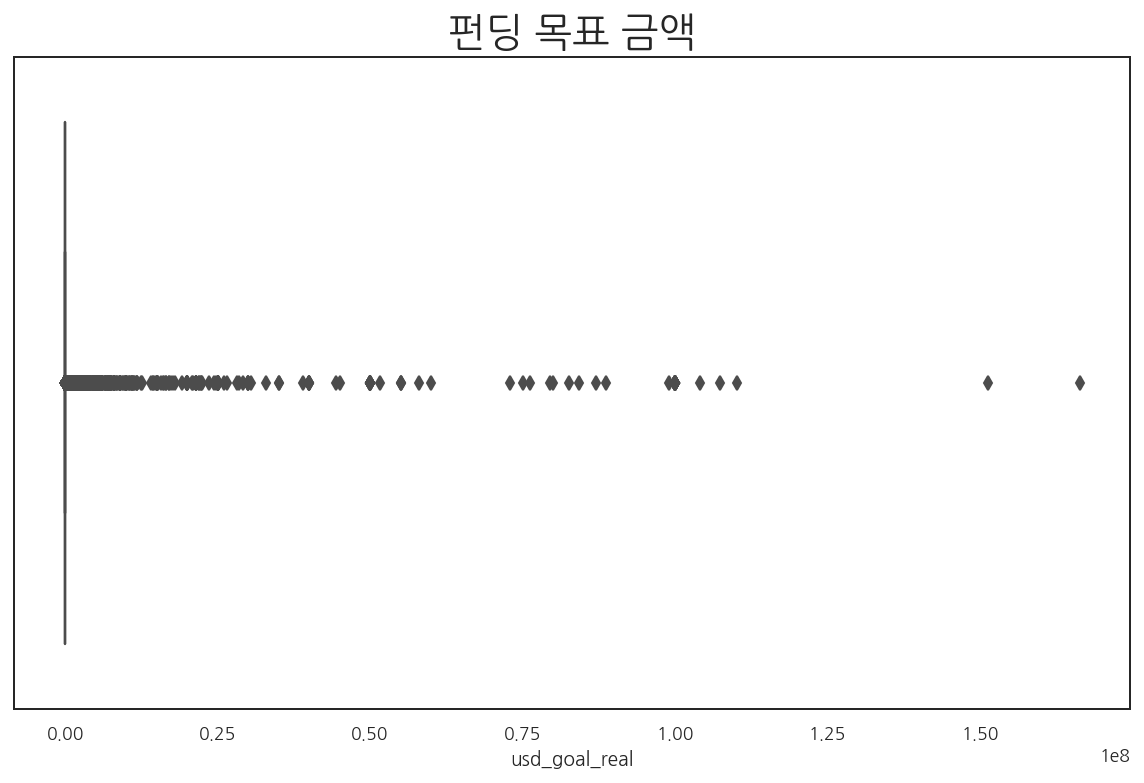

In [38]:
plt.figure(figsize=(10,6))
plt.title("펀딩 목표 금액", fontsize = 20)
sns.boxplot(x = projects_new['usd_goal_real'])

In [39]:
projects_new[['usd_goal_real']].describe()

,usd_goal_real
count,3.786540e+05
mean,4.545514e+04
std,1.152961e+06
min,1.000000e-02
25%,2.000000e+03
50%,5.500000e+03
75%,1.550000e+04
max,1.663614e+08


구간 구하기 위한 그래프...

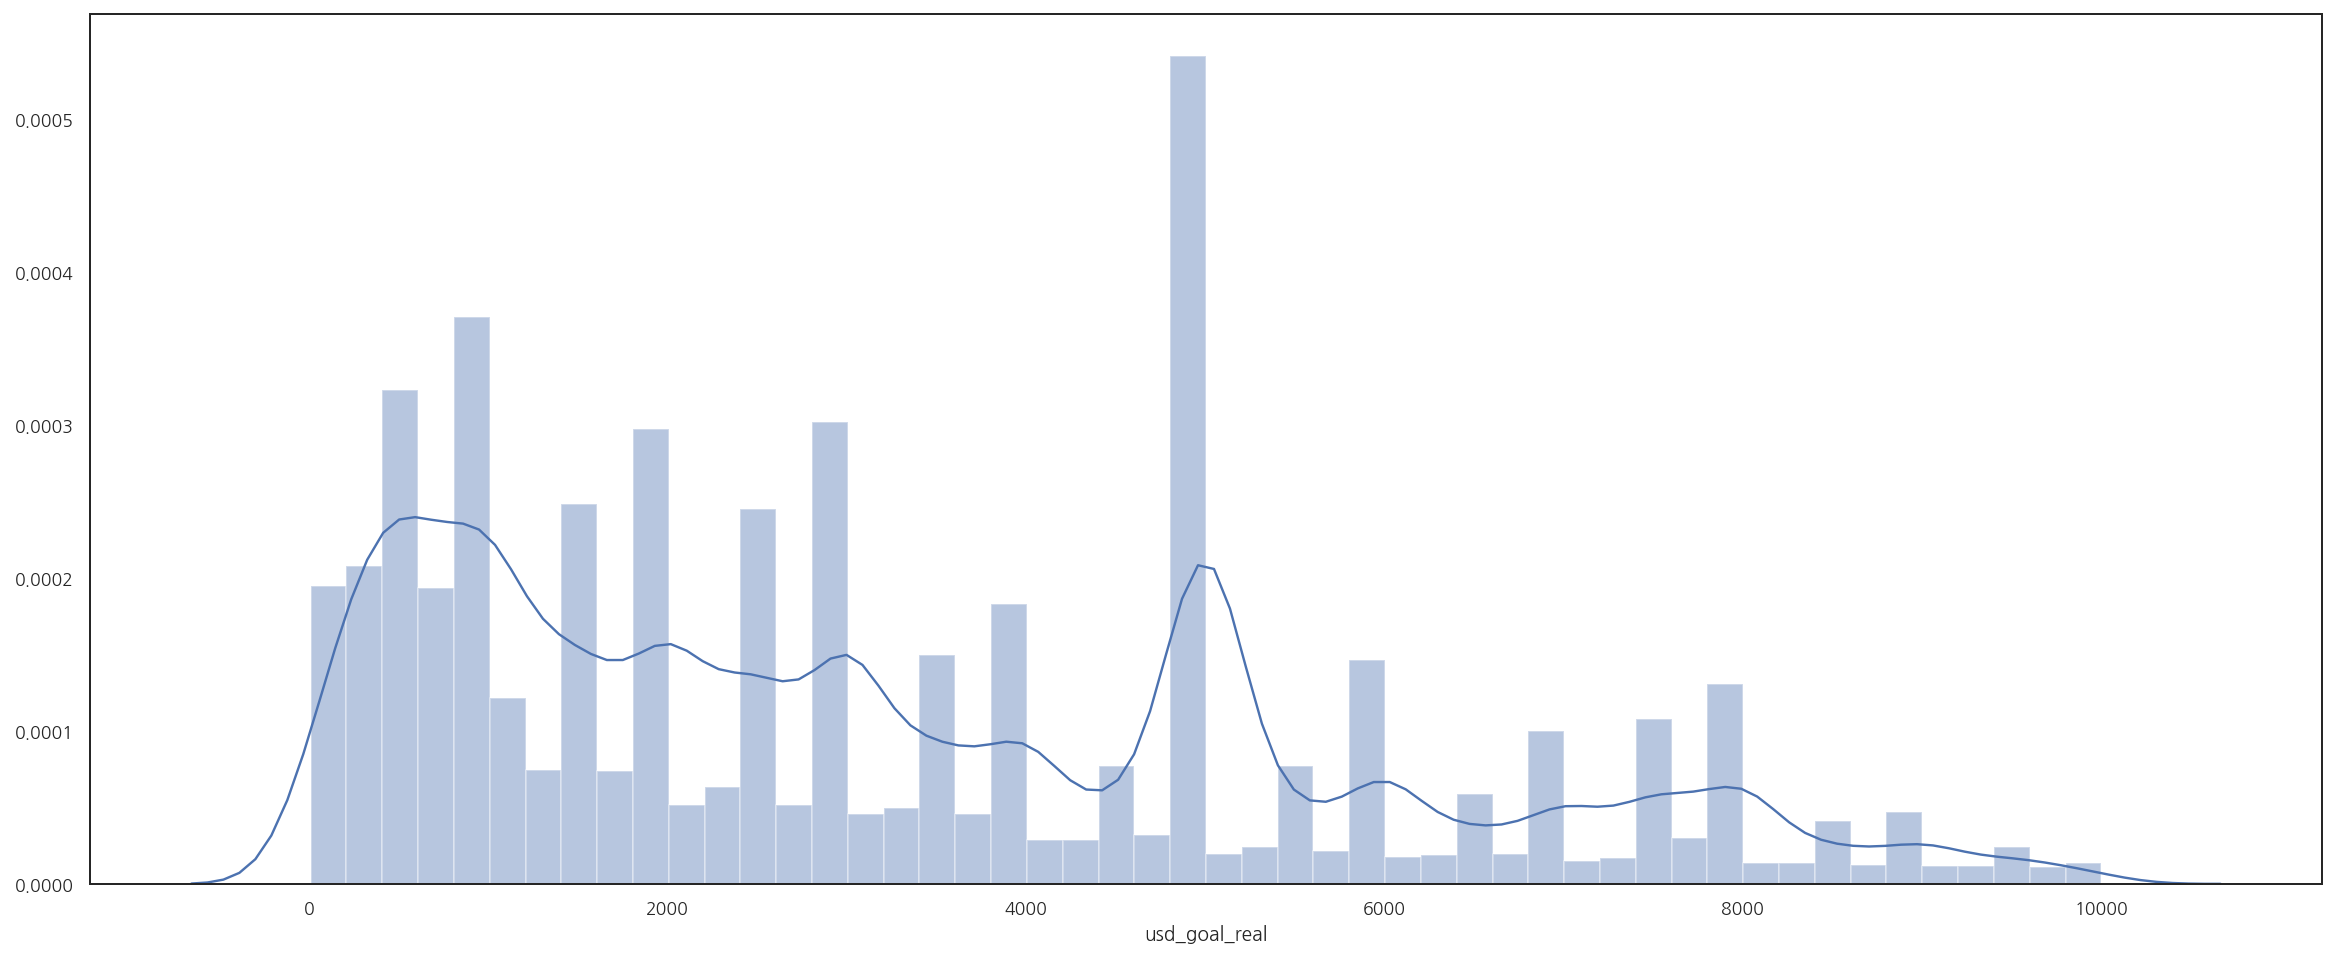

In [40]:
tmp2 = projects_new[lambda x: (x['usd_goal_real'] > 10) & (x['usd_goal_real'] < 10000)]
plt.figure(figsize=(20,8))
sns.distplot(tmp2['usd_goal_real'])

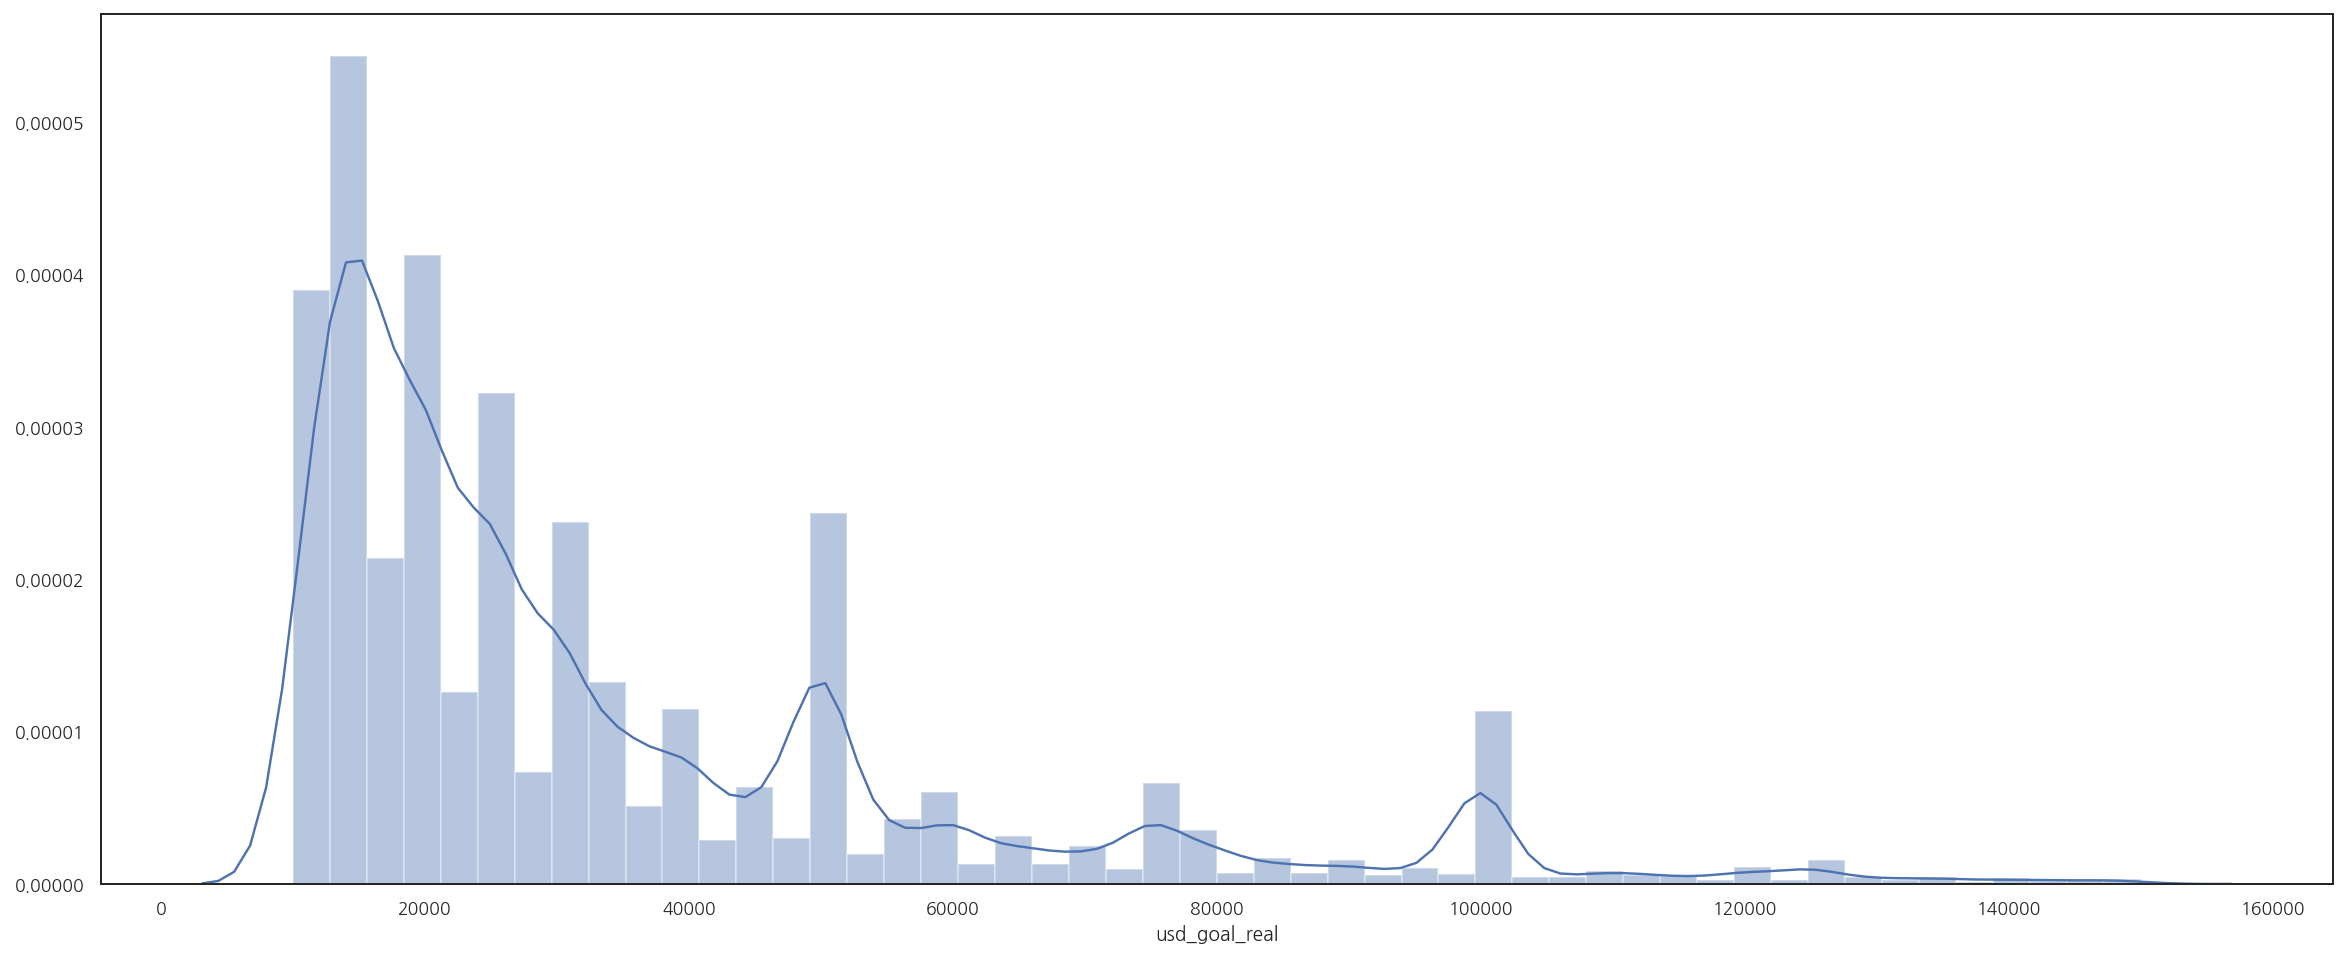

In [41]:
tmp2 = projects_new[lambda x: (x['usd_goal_real'] > 10000) & (x['usd_goal_real'] < 150000)]
plt.figure(figsize=(20,8))
sns.distplot(tmp2['usd_goal_real'])

In [42]:
len(projects_new[projects_new['usd_goal_real'] <= 100])

6082

In [43]:
# 10만원 이하로 펀딩 받는 경우는 지움
projects_fin = projects_new[projects_new['usd_goal_real'] > 100]

In [44]:
projects_fin = projects_fin.reset_index().drop(['index'], axis = 1)

In [45]:
# 500 / 천 / 3천 / 5천 / 1만 / 5만 / 10만
projects_fin['usd_goal_real_bin'] = projects_fin.apply(lambda x: '1' if x['usd_goal_real'] <= 500
                                                       else '2' if x['usd_goal_real'] <= 1000
                                                       else '3' if x['usd_goal_real'] <= 3000
                                                       else '4' if x['usd_goal_real'] <= 5000
                                                       else '5' if x['usd_goal_real'] <= 10000
                                                       else '6' if x['usd_goal_real'] <= 50000
                                                       else '7' if x['usd_goal_real'] <= 100000
                                                       else '8', axis = 1)

In [46]:
percent_list = []

for i in range(8):
    percent = len(projects_fin[lambda x: (x['usd_goal_real_bin'] == str(i+1)) & (x['state_new'] == 'success')]) / len(projects_fin[lambda x: x['usd_goal_real_bin'] == str(i+1)])
    percent_list.append(percent)

In [47]:
tmp = pd.DataFrame({'bars' : ['1', '2', '3', '4', '5', '6', '7', '8'], 
                    'percent' : percent_list})

In [48]:
tmp

,bars,percent
0,1,0.513672
1,2,0.477173
2,3,0.455461
3,4,0.394204
4,5,0.355509
5,6,0.268878
6,7,0.140577
7,8,0.058657


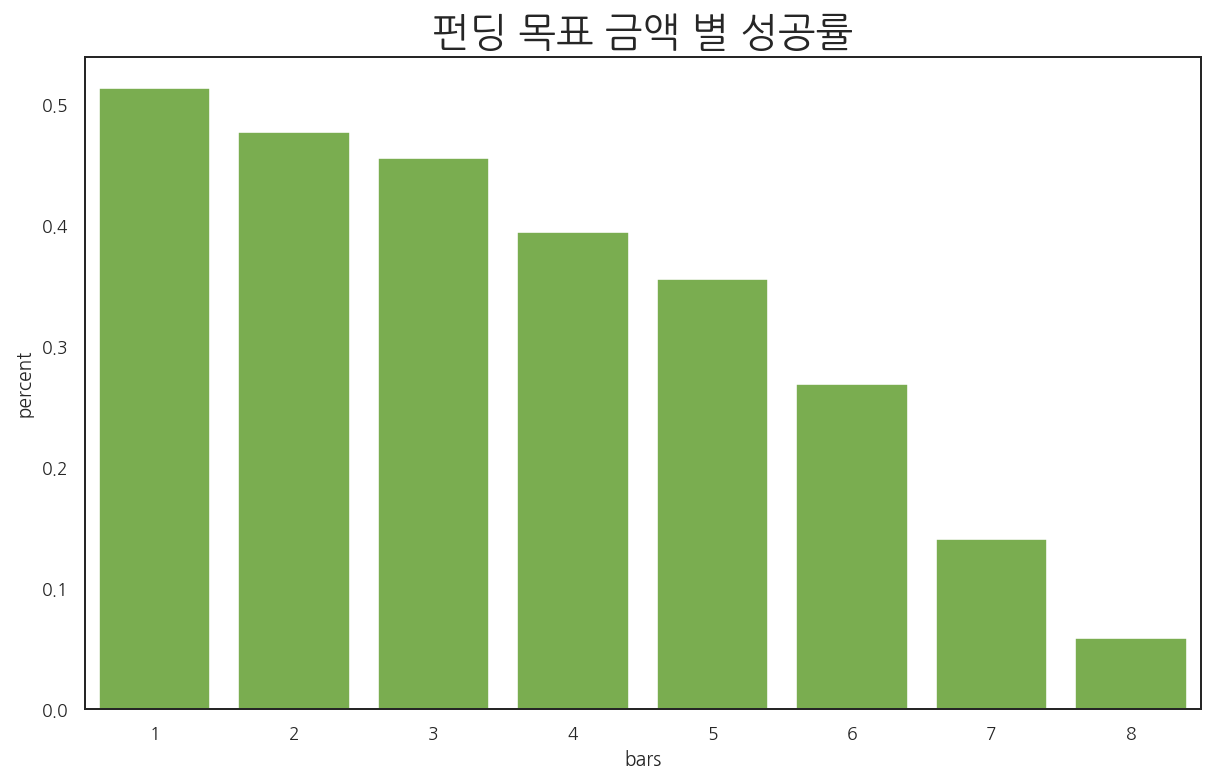

In [49]:
plt.figure(figsize=(10,6))
plt.title("펀딩 목표 금액 별 성공률", fontsize = 20)
sns.barplot(x = "bars", y = "percent", data = tmp, color = '#78BD40')